This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Aldo Pietromatera

## Imports

Please do **not** import any other library.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [28]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [29]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [30]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [31]:
regions = list(df.region.unique())

In [32]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [33]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [34]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [35]:
# selection of a region
region = "Bretagne"

# MY CODE ! in order to add a column to the dataframe indicating, for each record, in "which winter" the record is.
df['date'] = pd.to_datetime(df['date'])
#add 1 if the record is between 22/12 and 31/12
df['winter_year'] = np.where((df['date'].dt.month == 12) & (df['date'].dt.day >= 22), df['date'].dt.year + 1, df['date'].dt.year)

# OSS: For winter_year 2022, I mean the data in the winter between 22/12/2021 and 21/03/2022 !!!!!! 
# Same for the other years, except for 2013, where there is no December data.

df_region = df[df.region == region]
df_region

,region,date,consumption,winter_year
7606,Bretagne,2013-01-01,2595,2013
7607,Bretagne,2013-01-02,3195,2013
7608,Bretagne,2013-01-03,3157,2013
7609,Bretagne,2013-01-04,3142,2013
7610,Bretagne,2013-01-05,2859,2013
...,...,...,...,...
11404,Bretagne,2023-05-27,1761,2023
11405,Bretagne,2023-05-28,1610,2023
11406,Bretagne,2023-05-29,1677,2023
11407,Bretagne,2023-05-30,2057,2023


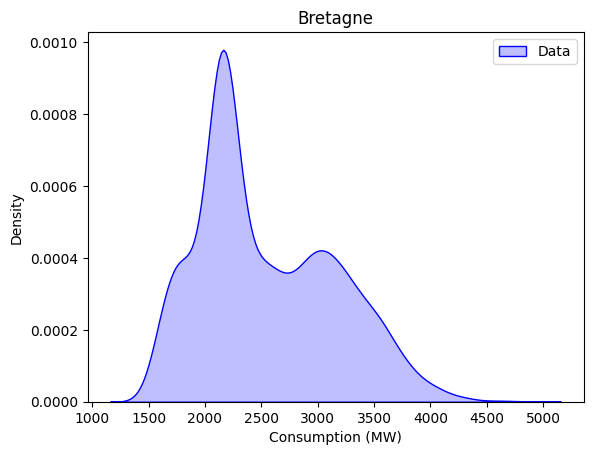

In [36]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

In order to show that the estimators are unbiased, we need to show that the expected value of the estimators is equal to the true value of the parameter.

In other words, we need to show that: 

$$
E[\hat{\mu}] - \mu = 0
$$

and

$$
E[\hat{\sigma^2}] - \sigma^2 = 0
$$.

Let's start with the mean estimator:

$$
E[\hat{\mu}] = E[\frac 1 n \sum_{i=1}^n x_i] = \frac 1 n \sum_{i=1}^n E[x_i] = \frac 1 n \sum_{i=1}^n \mu = \frac 1 n n \mu = \mu
$$

So the mean estimator is unbiased.

Now, let's show that the variance estimator is also unbiased:

$$
E[\hat{\sigma^2}] = E[\frac 1 {n-1} \sum_{i=1}^n {(x_i - \hat{\mu})^2}] = \frac 1 {n-1} E[\sum_{i=1}^n {(x_i - \hat{\mu})^2}] =
\newline
= \frac {1} {n-1} E( \sum_{i=1}^n (x_i^2-2\hat \mu x_i +\hat \mu^2)) = 
\newline
= \frac {1} {n-1} E( \sum_{i=1}^n x_i^2-2n\hat \mu\sum_{i=1}^n \frac {x_i} {n} + n\hat \mu^2) =
\newline
= \frac {1} {n-1} (\sum_{i=1}^n  E( x_i^2) -nE(\hat \mu^2))
$$

In addition, we know that:

$$
E(\hat \mu^2)=Var(\hat \mu) + E(\hat \mu)^2 = \frac 1 {n^2} Var(\sum_{i=1}^n x_i) + \frac 1 n E(\sum_{i=1}^n x_i)^2 = \frac {\sigma^2} {n} + \mu^2
$$

If we substitute this in the previous equation, we get:

$$
E(\hat \sigma^2) = \frac {1} {n-1} (\sum_{i=1}^n  E( x_i^2) -nE(\hat \mu^2)) = \frac {1} {n-1} (n\sigma^2+n\mu^2 - n\frac {\sigma^2} n - n\mu^2) = \sigma^2
$$

So, the variance estimator is also unbiased.

<!-- TODO -->

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [37]:
def get_mean_std_est(data):
    """
    Compute the estimator of mean and  standard deviation.
    """
    mean_est = data.sum() / data.count()
    var_est = ((data - mean_est)**2).sum() / (data.count() - 1)
    std_est = np.sqrt(var_est)

    return mean_est, std_est

In [38]:
mean_estimator, std_estimator = get_mean_std_est(df_region.consumption)

#Print values for mean and standard deviation
print("Mean estimator: ", mean_estimator)
print("Standard deviation estimator: ", std_estimator)

Mean estimator:  2546.536155666579
Standard deviation estimator:  604.9429842099315


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [39]:
num_samples = df_region.consumption.count()
new_samples = np.random.normal(loc=mean_estimator, scale=std_estimator, size=num_samples)

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

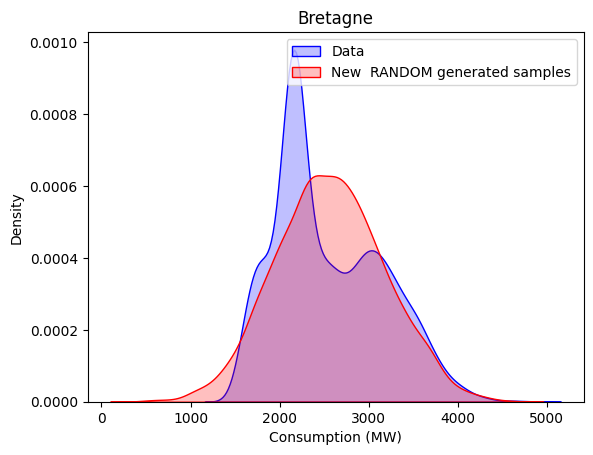

In [40]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_samples, label="New  RANDOM generated samples", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()    
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

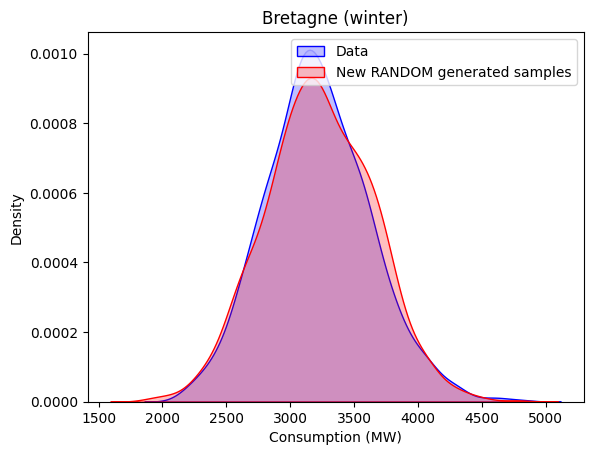

In [41]:
# Create and return a mask to filter rows in the winter, given a df and an optional year (yyyy) in input
def get_mask_winter(df, yyyy = None):

    # df['date'] = pd.to_datetime(df['date'])

    mask = ((df['date'].dt.month == 12) & (df['date'].dt.day >= 22)) | ((df['date'].dt.month >= 1) & (df['date'].dt.month <= 2)) | ((df['date'].dt.day <= 21) & (df['date'].dt.month == 3))

    if yyyy is None:
        return mask
    else:
        return mask & (df['winter_year'] == yyyy)

# Apply the mask to select the rows 
df_bretagne_winter = df_region[get_mask_winter(df_region)]

# Compute the mean and std of the filtered data
mean_estimator, std_estimator = get_mean_std_est(df_bretagne_winter.consumption)

num_samples_winter = df_bretagne_winter.consumption.count()
new_samples_winter = np.random.normal(loc=mean_estimator, scale=std_estimator, size=num_samples_winter)

# density (with kde = kernel density estimation)
sns.kdeplot(data=df_bretagne_winter, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_samples_winter, label="New RANDOM generated samples", color='red', fill=True)
plt.title(region+" (winter)")
plt.xlabel("Consumption (MW)")
plt.legend()    
plt.show()


6. In which case the Gaussian model seems more appropriate?

From the plot, we can see that in the winter case, the Gaussian model seems more appropriate.
Indeed, the real data is more concentrated around the mean than in the general case.
In the first case, the data is more spread out, and the Gaussian model is not a good fit.

N.B. We generate RANDOM samples each time we run the code, so the plots may be different from one run to another.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

To demonstrate that the distance metric $d(f,g)$ falls within the interval $[0,1]$, we can break it down into two key observations:

1. **Non-Negativity**: It's evident that $d(f,g) \geq 0$ because the absolute difference $\left|f(x) - g(x)\right|$ is always a non-negative function, and integrating a non-negative function over a range also yields a non-negative result.

2. **Upper Bound**: The upper bound $d(f,g) \leq 1$ arises from the fact that both $f$ and $g$ are probability density functions (PDFs). This means they have two essential properties: non-negativity ($f \geq 0$ and $g \geq 0$) and the integral of each PDF over its entire domain equals 1 ($\int f(x)dx = 1$ and $\int g(x)dx = 1$).

   Therefore, $d(f,g)$ is defined as $\frac{1}{2}\int \left|f(x) - g(x)\right|dx$, and by the properties of PDFs, it can be bounded as:

   $$
   d(f,g) = \frac{1}{2}\int \left|f(x) - g(x)\right|dx \leq \frac{1}{2}\left(\int \left|f(x)\right|dx + \int \left|g(x)\right|dx\right) = \frac{2}{2} = 1
   $$

Now, to address the conditions for $d(f,g) = 0$ and $d(f,g) = 1$:

 - $d(f,g) = 0$: This occurs if and only if $\frac{1}{2}\int \left|f(x) - g(x)\right|dx = 0$. Since $\left|f(x) - g(x)\right|$ is non-negative, for the integral to be zero, $f(x) - g(x)$ must be equal to zero almost everywhere, implying that $f$ and $g$ are equal almost everywhere.

 - $d(f,g) = 1$: This condition arises if and only if $\frac{1}{2}\int \left|f(x) - g(x)\right|dx = 2$. Considering the properties of PDFs, this implies that $\left|f(x) - g(x)\right| = 1$ almost everywhere, which means that the two PDFs have disjoint supports.

In summary, these properties of the distance metric $d(f,g)$ help us quantify the dissimilarity between PDFs, with values between 0 and 1, where 0 signifies that the PDFs are almost everywhere equal, and 1 indicates that they have disjoint supports.



2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [42]:
def compute_metric(f, g):
    return 0.5 * np.sum(np.abs(f - g))

In [43]:
def eval_dissimiliraty(data):

    values = data

    kde_real_data = gaussian_kde(data).pdf(values)

    mean_estimator, std_estimator = get_mean_std_est(data)
    density_gaussian_model = norm.pdf(values, loc=mean_estimator, scale=std_estimator)

    return compute_metric(kde_real_data, density_gaussian_model)

In [44]:
print("Dissimilarity Bretagne: ", eval_dissimiliraty(df_region.consumption))

Dissimilarity Bretagne:  0.3647953815716011


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [45]:
print("Dissimilarity Bretagne in Winter: ", eval_dissimiliraty(df_bretagne_winter.consumption))

Dissimilarity Bretagne in Winter:  0.01670343398220682


4. Do the same for all regions. Give the result as a single dataframe.

In [46]:
# Compute the dissimilarity for each region considering the whole year

df_dissimilarities = df.groupby("region").consumption.apply(eval_dissimiliraty).reset_index()
df_dissimilarities =  df_dissimilarities[["region", "consumption"]].rename(columns={"consumption": "dissimilarity"})
df_dissimilarities

,region,dissimilarity
0,Auvergne-Rhône-Alpes,0.115859
1,Bourgogne-Franche-Comté,0.229804
2,Bretagne,0.364795
3,Centre-Val de Loire,0.409516
4,Grand Est,0.109481
5,Hauts-de-France,0.121480
6,Normandie,0.273439
7,Nouvelle-Aquitaine,0.250032
8,Occitanie,0.291401
9,Pays de la Loire,0.269564


5. Which region is best fitted by a Gaussian model in winter?

In [47]:
df_winter = df[get_mask_winter(df)]

#Compute the dissimilarity for each region considering only the winter

df_dissimilarities_winter = df_winter.groupby("region").consumption.apply(eval_dissimiliraty).reset_index()
df_dissimilarities_winter =  df_dissimilarities_winter[["region", "consumption"]].rename(columns={"consumption": "dissimilarity"}).sort_values(by="dissimilarity", ascending=True)
region_best_fitted = df_dissimilarities_winter["region"].iloc[0]

print(df_dissimilarities_winter)
print("\n\nThe best fitted region by a Gaussian model in winter is: ", region_best_fitted)

                        region  dissimilarity
5              Hauts-de-France       0.007846
11               Île-de-France       0.007852
0         Auvergne-Rhône-Alpes       0.008149
4                    Grand Est       0.012452
9             Pays de la Loire       0.013597
10  Provence-Alpes-Côte d'Azur       0.013934
7           Nouvelle-Aquitaine       0.014704
6                    Normandie       0.016102
2                     Bretagne       0.016703
8                    Occitanie       0.020423
1      Bourgogne-Franche-Comté       0.023680
3          Centre-Val de Loire       0.026052


The best fitted region by a Gaussian model in winter is:  Hauts-de-France


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

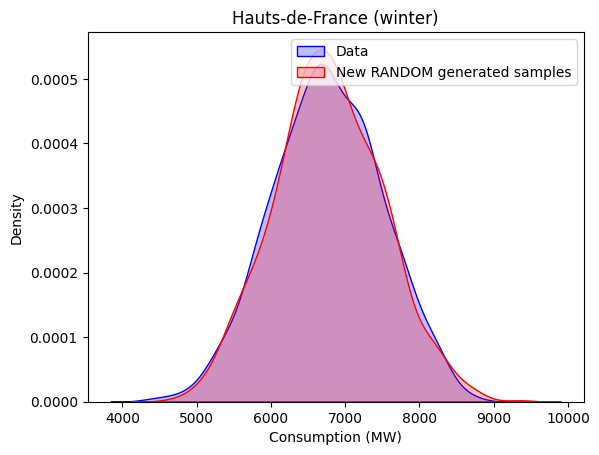

In [48]:
df_region_best_fitted = df[df.region == region_best_fitted]
df_region_best_fitted_winter = df_region_best_fitted[get_mask_winter(df_region_best_fitted)]

mean_est_w, std_est_w = get_mean_std_est(df_region_best_fitted_winter.consumption)

new_generated_data = np.random.normal(loc=mean_est_w, scale=std_est_w, size=df_region_best_fitted_winter.consumption.count())

sns.kdeplot(data=df_region_best_fitted_winter, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_generated_data, label="New RANDOM generated samples", color='red', fill=True)
plt.title(region_best_fitted+" (winter)")
plt.xlabel("Consumption (MW)")
plt.legend()    
plt.show()


## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma$=400MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0$=3500MW and standard deviation $\sigma_0$=500MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

Prior distribution of $\mu$:

$\mu \text{\textasciitilde} \mathcal{N}(\mu_0, \sigma_0^2)$

We know that the posterior probability is directly proportional to the product between the prior probability and the likelihood.
So, given the prior probability distribution, we can say that:

$\mu \text{\textasciitilde} \mathcal{N}(\mu_n, \sigma_n^2)$

where:

$\mu_n = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$

and

$\sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [49]:
# parameters of the prior gaussian distribution
mu_0 = 3500 # MW
sigma_0 = 500 # MW

sigma = 400 # MW

# Compute the posterior mean and variance for each year
# df_bretagne_winter['year'] = df_bretagne_winter['date'].dt.year
df_bret_w_YSC = df_bretagne_winter.groupby('winter_year', as_index=False)['consumption'].agg(['sum', 'count']).astype(int)
df_bret_w_YSC['posterior mean'] = (mu_0/(sigma_0**2) + df_bret_w_YSC['sum']/(sigma**2)) / (1/(sigma_0**2) + df_bret_w_YSC['count']/(sigma**2))
df_bret_w_YSC['posterior var'] = 1/(1/(sigma_0**2) + df_bret_w_YSC['count']/(sigma**2))
df_bret_w_YSC

# Remember: For winter_year 2022, I mean the data in the winter between 22/12/2021 and 21/03/2022 !!!!!! 
# Same for the other years, except for 2013, where there is no December data.

,winter_year,sum,count,posterior mean,posterior var
0,2013,271547,80,3395.176091,1984.126984
1,2014,278303,90,3095.134598,1765.225066
2,2015,290489,90,3229.578553,1765.225066
3,2016,284938,91,3133.762549,1745.962462
4,2017,294680,90,3275.816417,1765.225066
5,2018,299473,90,3328.695940,1765.225066
6,2019,285989,90,3179.931598,1765.225066
7,2020,284049,91,3124.061545,1745.962462
8,2021,302370,90,3360.657546,1765.225066
9,2022,289262,90,3216.041483,1765.225066


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

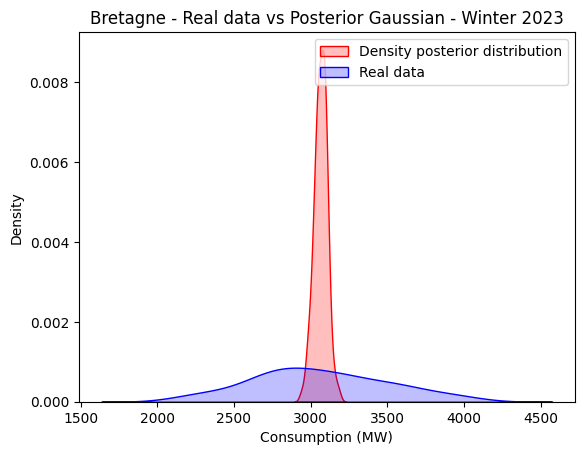

In [56]:
mean_2023 = float(    df_bret_w_YSC[df_bret_w_YSC['winter_year'] == 2023]['posterior mean'].iloc[0])
var_2023 = float(    df_bret_w_YSC[df_bret_w_YSC['winter_year'] == 2023]['posterior var'].iloc[0])

# generating new samples with the posterior mean and variance computed before
# use the same number of samples as the real data
num_samples_2023 = df_bret_w_YSC[df_bret_w_YSC['winter_year'] == 2023]['count'].iloc[0]
new_samples_2023 = np.random.normal(  loc=mean_2023, scale=np.sqrt(var_2023), size=num_samples_2023)

# real data of bretagne in winter 2023 (i.e. December 2022 - March 2023)
df_bretagne_winter_2023 = df_region[get_mask_winter(df_region, 2023)]

sns.kdeplot(data=new_samples_2023, label="Density posterior distribution", color='red', fill=True)
sns.kdeplot(data=df_bretagne_winter_2023, x='consumption', label="Real data", color='blue', fill=True)
plt.title(str(region) + " - Real data vs Posterior Gaussian - Winter 2023")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer:

The generated data doesn't match the real data because the range of values in the generated data is narrower than that in the real data. This is because the prior has a stronger influence on the final result when calculating the posterior variance.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

I can suppose a Null Hypothesis $H_0 = \{\theta_{0} = 400MW\}$ and an Alternative Hypothesis $H_1 = \{\theta_{1} = 500MW\}$.

That means that:
- the Null Hypothesis is that the standard deviation is equal to 400MW in winter 2023.
- the Alternative Hypotesis is that the standard deviation is equal to 500MW in winter 2023.

So, we are talking about a SIMPLE HYPOTHESIS TEST and we know that for this kind of test is always possibile to find a UMP test of the form:

$$
\delta(x)=\mathbf{1}_{\{\frac {p_1(x)}{p_0(x)} \gt c\}}, \space  for\space any \space c \gt 0
$$
where $p_0$ and $p_1$ are the probability density functions of the Null and Alternative Hypothesis, respectively.

We can approssimate the pdfs with the following - (mean is known and the variance is unkwnown):

$$P_{\theta} \text{\textasciitilde} \Nu(\mu, \theta)$$

In addition:

$$\frac {p_1(x)} {p_0(x)} \propto \exp^{\frac {1} {2} (\frac {1} {\theta_{0}^2} - \frac {1} {\theta_{1}^2}) S}\space\space\space with \space S = \sum_{i=1}^n (x_i - \mu)^2$$

So we can rewrite the test as:

$$\delta(x)=\mathbf{1}_{\{S \gt c\}}\space\space\space\space for\space c \gt 0$$

We can approximate $S$ with:
$$S\text{\textasciitilde}\theta^2 Z\space\space\space\space with\space Z\text{\textasciitilde}\chi^2(n)$$

Then we have:
$$\alpha = P_0 (S \gt c) = P_0 (\theta^2 Z \gt c)=P_0 (Z \gt \frac c {\theta^2})$$

Finally, we can calculate $c$ as follows:

$$\frac{c}{\theta_0^2} = Q_{\chi^2(n)}{(1-\alpha)} \implies c = \theta_0^2 Q_{\chi^2(n)}{(1-\alpha)}$$

At the end, if $S \gt c$, we reject the Null Hypothesis, otherwise we accept it.

<ins>P.S. Inspired by ex8 of the td-4 of the course.<ins>


2. Provide the result of this test for $\alpha=1\%$.

In [57]:
alpha = 0.01
mean = 3200
sigma_0 = 400 #std dev of H0

n = len(df_bretagne_winter_2023)

# Reject H0 ?
S = ((df_bretagne_winter_2023.consumption - mean)**2).sum()
c = chi2.ppf(1-alpha, df=n) * (sigma_0**2)

print("S = ", S)
print("c = ", c)

print("\nReject H0?", S > c )

S =  18736029
c =  19858610.989779405

Reject H0? False


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/aldo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Bretagne consumption,Provence-Alpes-Côte d'Azur consumption
Bretagne consumption,1.00000,0.71678
Provence-Alpes-Côte d'Azur consumption,0.71678,1.00000


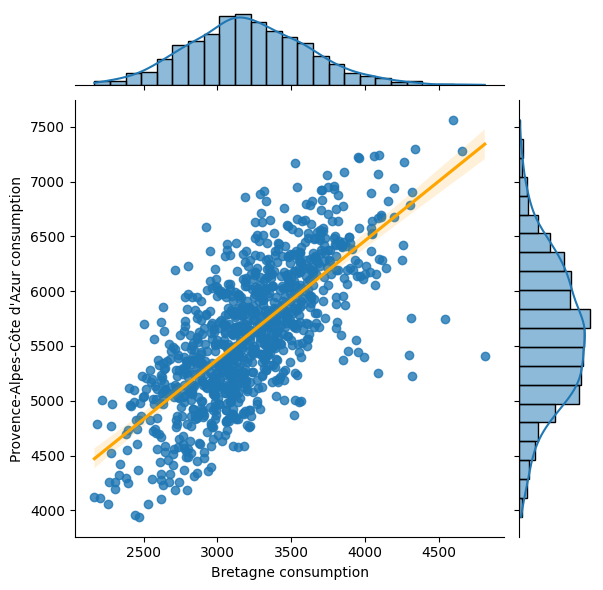

In [217]:
# Transform in datetime objects the dates in the original dataframe
# df["date"] = pd.to_datetime(df["date"])

df_provence = df[df.region == "Provence-Alpes-Côte d'Azur"]
df_provence_winter = df_provence[get_mask_winter(df_provence)].reset_index(drop=True)

df_region_comparison = pd.DataFrame({
    "Bretagne consumption": df_bretagne_winter.reset_index(drop=True).consumption,
    "Provence-Alpes-Côte d'Azur consumption": df_provence_winter.consumption
})

sns.jointplot(df_region_comparison, x="Bretagne consumption", y="Provence-Alpes-Côte d'Azur consumption", kind="reg", joint_kws={'line_kws':{'color':'orange'}})

df_region_comparison.corr()

2. Do you think the power consumption in these two regions is independent?

Your answer: 

As we can see from the table above, the correlation between the power consumption in these two regions is relatively high (we have a value of about 0.717). As a consequence, we can say that the power consumption in these two regions is not independent.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

We have two hypothesis: $H_0 = \{X \perp Y\}$ and $H_1 = \{X \not\perp Y\}$.

In other words, we would like to test the independence between X and Y, where X and Y are the winter consumption data of Bretagne and Provence-Alpes-Côte d'Azur.

We start choosing two partitions of the value spaces: $A_1, ..., A_K\space and \space B_1, ..., B_L$

Then we define:

$$N_{ij} = \sum_{t=1}^n \mathbf 1_{\{X_t \in A_i, Y_t \in B_j\}}\space\space N_i = \sum_{t=1}^n \mathbf 1_{\{X_t \in A_i\}}\space\space N_j = \sum_{t=1}^n \mathbf 1_{\{Y_t \in B_j\}}$$

that we can use to define the test statistic:

$$
T(X, Y) = \sum_{i,j}{\frac{(N_{ij}-\frac{N_{i}N_{j}}{n})^2}{\frac{N_{i}N_{j}}{n}}}\sim\chi^2((K-1)(L-1)) \space \text{ when } n \to \infty
$$

The test is then:

$$
    \delta(x)=\mathbf{1}_{\{T(X, Y) \gt c\}}
$$

i.e. the independence is rejected when $T(X, Y) \gt c$.

For a test at level $\alpha$, we have:

$$
    \alpha = P_0(T(X, Y) \gt c)
$$

For large n, we can approximate the distribution of $T(X, Y)$ with a $\chi^2$ distribution with $(K-1)(L-1)$ degrees of freedom.

So, 

$$
    c = Q_{\chi^2((K-1)(L-1))}{(1-\alpha)}
$$

4. Give the result of this test for $\alpha=1\%$. 

In [218]:
alpha = 0.01 
K = L = 10
 
degrees_of_freedom = (K - 1) * (L - 1)
print(degrees_of_freedom)
c = chi2.ppf(1 - alpha, df=degrees_of_freedom)
 
min_val_bret = min(df_bretagne_winter.consumption)
max_val_bret = max(df_bretagne_winter.consumption)

min_val_prov = min(df_provence_winter.consumption)
max_val_prov = max(df_provence_winter.consumption)

y = ((min_val_bret, max_val_bret), (min_val_prov, max_val_prov))
matrix = np.histogram2d(df_bretagne_winter.consumption, df_provence_winter.consumption, bins=[K, L], range=y )[0]
 
Ni = matrix.sum(axis=1)
Nj = matrix.sum(axis=0)
n = matrix.sum()

T=0
for i in range(K):
    for j in range(L):
        observed = matrix[i][j]
        expected = (Ni[i] * Nj[j]) / n
        x = ((observed - expected) ** 2) / expected
        T += x
 
print("T =", T) 
print("c =", c)
print("\nReject H0?", T > c)

T = 1072.4504724723213
c = 113.51241047036046

Reject H0? True


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

In [219]:
def conf_int(data, alpha):
    n = len(data)

    x_bar = data.mean()
    # print(x_bar)

    c = t.ppf((1-alpha/2), df=n-1)
    # print(c)

    # V0 is an unbiased variance estimator
    V_0 = 1/(n-1) * ((data - x_bar)**2).sum()
    # print(V_0)

    # Confidence interval with the provided alpha
    lower_bound = x_bar - c*np.sqrt(V_0/(n))
    upper_bound = x_bar + c*np.sqrt(V_0/(n))
    
    return lower_bound, upper_bound

alpha = 0.05  # confidence level of 95%

# I use data of Bretagne in winter, from 2013 to 2023.
l, u = conf_int(data=df_bretagne_winter.consumption, alpha=alpha)
print("Confidence Interval at level 95%: [", l,",", u, "]")

Confidence Interval at level 95%: [ 3188.5358856463263 , 3239.820529832289 ]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [220]:
# we already have alpha=0.05
mu_0 = 3100

# I use the values of the winter 2023 in Bretagne. (From Decemebr 2022 to March 2023), since at the beginning of the point F
# there is writter "Consider the region Bretagne in winter".

l, u = conf_int(data=df_bretagne_winter_2023.consumption, alpha=alpha)
print("Confidence interval at level 95%: [", l,",", u, "]")

# Reject H0 ?
print("\nReject H0 ?", (mu_0 <= l) or (mu_0 >= u))

Confidence interval at level 95%: [ 2966.7052485693216 , 3149.361418097345 ]

Reject H0 ? False


Since 3100 is inside the confidence interval, we FAIL to reject H0.